In [1]:
import numpy as np
import pandas as pd

import scipy.spatial as sp

import umap

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load CCC matrices

In [2]:
curated_ccc = pd.read_csv('../Figures/CCC-Celegans-CuratedLR.csv', index_col=0)

In [3]:
curated_ccc.head()

,Am/PH_sheath_cells;Am/PH_sheath_cells,Am/PH_sheath_cells;Body_wall_muscle,Am/PH_sheath_cells;Canal_associated_neurons,Am/PH_sheath_cells;Cholinergic_neurons,Am/PH_sheath_cells;Ciliated_sensory_neurons,Am/PH_sheath_cells;Coelomocytes,Am/PH_sheath_cells;Excretory_cells,Am/PH_sheath_cells;GABAergic_neurons,Am/PH_sheath_cells;Germline,Am/PH_sheath_cells;Intestinal/rectal_muscle,...,Touch_receptor_neurons;Other_interneurons,Touch_receptor_neurons;Oxygen_sensory_neurons,Touch_receptor_neurons;Pharyngeal_epithelia,Touch_receptor_neurons;Pharyngeal_gland,Touch_receptor_neurons;Pharyngeal_muscle,Touch_receptor_neurons;Pharyngeal_neurons,Touch_receptor_neurons;Rectum,Touch_receptor_neurons;Seam_cells,Touch_receptor_neurons;Somatic_gonad_precursors,Touch_receptor_neurons;Touch_receptor_neurons
arf-1.2 / pld-1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
daf-7 / sma-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
srp-6 / F14B4.1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
adm-2 / pat-3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
adm-2 / pat-2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
selected_ccc = pd.read_csv('../Figures/CCC-Celegans-SelectedLR.csv', index_col=0)

In [5]:
selected_ccc.head()

,Am/PH_sheath_cells;Am/PH_sheath_cells,Am/PH_sheath_cells;Body_wall_muscle,Am/PH_sheath_cells;Canal_associated_neurons,Am/PH_sheath_cells;Cholinergic_neurons,Am/PH_sheath_cells;Ciliated_sensory_neurons,Am/PH_sheath_cells;Coelomocytes,Am/PH_sheath_cells;Excretory_cells,Am/PH_sheath_cells;GABAergic_neurons,Am/PH_sheath_cells;Germline,Am/PH_sheath_cells;Intestinal/rectal_muscle,...,Touch_receptor_neurons;Other_interneurons,Touch_receptor_neurons;Oxygen_sensory_neurons,Touch_receptor_neurons;Pharyngeal_epithelia,Touch_receptor_neurons;Pharyngeal_gland,Touch_receptor_neurons;Pharyngeal_muscle,Touch_receptor_neurons;Pharyngeal_neurons,Touch_receptor_neurons;Rectum,Touch_receptor_neurons;Seam_cells,Touch_receptor_neurons;Somatic_gonad_precursors,Touch_receptor_neurons;Touch_receptor_neurons
daf-7 / sma-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
let-756 / ver-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cle-1 / gpn-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
let-2 / pat-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
srp-7 / F14B4.1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [6]:
meta = pd.read_csv('../Data/RNA-Seq/Celegans_cell_metadata.tsv', sep='\t',
                   index_col='#SampleID'
                  )

In [7]:
meta.head()

,type,Groups
#SampleID,,
Germline,Sexual cell,Sexual cells
Intestinal/rectal_muscle,Digestive,Body/muscular cells
Coelomocytes,Immunity,Coelomocytes
Ciliated_sensory_neurons,Neuron,Neurons
Seam_cells,Body,Hypodermal/rectal cells


# UMAP Visualization

In [8]:
def ccc_umap_plot(ccc_matrix,
                  metadata,
                  figsize=(16,9),
                  color_col='Groups',
                  metric='jaccard',
                  min_dist=0.4,
                  n_neighbors=8,
                  colors=None,
                  s=40,
                  ticksize=18,
                  output_file=None,
                  random_state=None
                 ):
    '''
    This function runs a umap on a ccc matrix and compare two coloring conditions.
    ccc_matrix : pandas.Dataframe
        Columns of this dataframe represent pairs of cells and 
        rows are ligand-receptor pairs.
    '''
    model = umap.UMAP(metric="precomputed",
                      min_dist=min_dist,
                      n_neighbors=n_neighbors,
                      random_state=random_state)
    
    D = sp.distance.pdist(ccc_matrix.T, metric=metric)
    D_sq = sp.distance.squareform(D)
    trans_D = model.fit_transform(D_sq)
    umap_df = pd.DataFrame(trans_D, columns=['umap1', 'umap2'], index=ccc_matrix.columns)
    
    umap_df['Sender-Color'] = [colors[meta.at[idx.split(';')[0], color_col]] \
                               for idx in umap_df.index]
    umap_df['Receiver-Color'] = [colors[meta.at[idx.split(';')[1], color_col]] \
                                 for idx in umap_df.index]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    ax1.scatter(umap_df['umap1'].values,
                umap_df['umap2'].values,
                c=umap_df['Sender-Color'].values, s=s)
    ax1.axis('square')
    ax1.tick_params(axis='both', labelsize=ticksize)
    ax1.set_xlabel('umap 1', fontsize=int(1.2*ticksize))
    ax1.set_ylabel('umap 2', fontsize=int(1.2*ticksize))
    
    ax2.scatter(umap_df['umap1'].values,
                umap_df['umap2'].values,
                c=umap_df['Receiver-Color'].values, s=s)
    ax2.axis('square')
    ax2.tick_params(axis='both', labelsize=ticksize)
    ax2.set_xlabel('umap 1', fontsize=int(1.2*ticksize))
    ax2.set_ylabel('umap 2', fontsize=int(1.2*ticksize))
    
    plt.tight_layout(pad=5.0) # pad controls the spacing between subplots
    if output_file is not None:
        plt.savefig(output_file, dpi=300,
                    bbox_inches='tight')

In [9]:
# Colors from figure S14 in C elegans paper (cell type expression data)
colors = {'Coelomocytes': (0.6509803921568628, 0.33725490196078434, 0.1568627450980392), # Brown
          'Neurons': (0.596078431372549, 0.3058823529411765, 0.6392156862745098), # Purple
          'Hypodermal/rectal cells': (0.30196078431372547, 0.6862745098039216, 0.2901960784313726), # Green
          'Pharyngeal cells': (0.21568627450980393, 0.49411764705882355, 0.7215686274509804), # Blue
          'Intestine': (1.0, 1.0, 0.2), # Yellow
          'Body/muscular cells': (0.8941176470588236, 0.10196078431372549, 0.10980392156862745), # Red
          'Excretory/Socket/Sheath cells': (1.0, 0.4980392156862745, 0.0), # Orange
          'Sexual cells': (0.9686274509803922, 0.5058823529411764, 0.7490196078431373)} # Pink

/Users/earmingol/opt/anaconda3/envs/c2c_dev/lib/python3.7/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


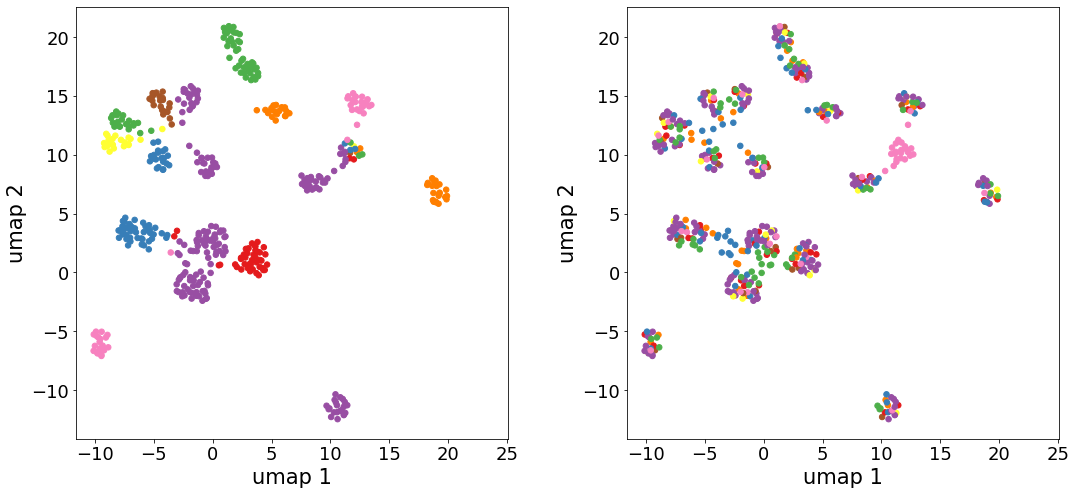

In [10]:
ccc_umap_plot(curated_ccc, meta, colors=colors, s=30, min_dist=0.8, random_state=888,
              output_file='../Figures/UMAP-Celegans-CuratedLR.svg'
             )

/Users/earmingol/opt/anaconda3/envs/c2c_dev/lib/python3.7/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


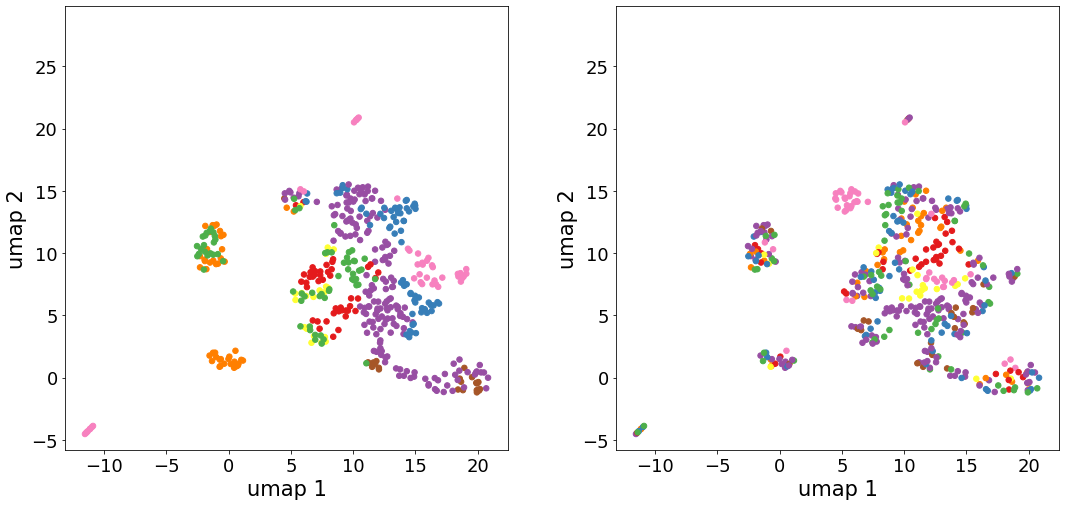

In [11]:
ccc_umap_plot(selected_ccc, meta, colors=colors, s=30, min_dist=0.8, random_state=888, 
              output_file='../Figures/UMAP-Celegans-SelectedLR.svg'
             )